In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
data={
    'Study_Hours':[1,2,3,4,5],
    'Marks':[10,25,55,90,130]
}

In [3]:
df = pd.DataFrame(data)
df

,Study_Hours,Marks
0,1,10
1,2,25
2,3,55
3,4,90
4,5,130


In [4]:
X = df[["Study_Hours"]]
y = df["Marks"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state=42)

In [6]:
poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train)

X_test_poly = poly.transform(X_test)


In [7]:
X_train

,Study_Hours
4,5
2,3
0,1
3,4


In [8]:
y_train

4    130
2     55
0     10
3     90
Name: Marks, dtype: int64

In [9]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [10]:

y_train_pred= model.predict(X_train_poly)
y_test_pred= model.predict(X_test_poly)


In [11]:

print("Training MSE:", mean_squared_error(y_train, y_train_pred))
print("Testing MSE:", mean_squared_error(y_test, y_test_pred))


Training MSE: 0.22727272727272935
Testing MSE: 16.735537190082695


C:\Users\ASUS\anaconda4\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


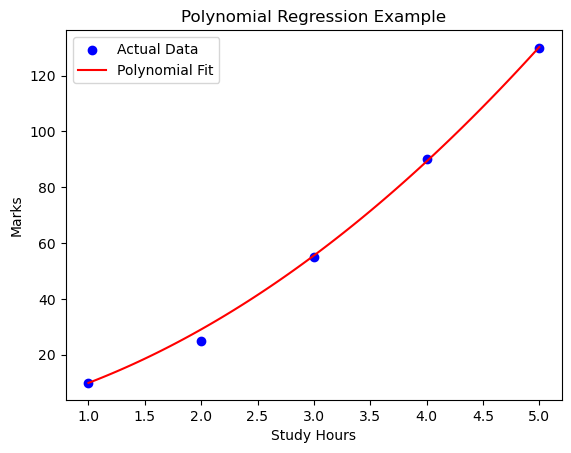

In [12]:
plt.scatter(X, y, color='blue', label='Actual Data')
X_line = np.linspace(min(X['Study_Hours']), max(X['Study_Hours']), 100).reshape(-1, 1)
y_line= model.predict(poly.transform(X_line))
plt.plot(X_line, y_line, color='red', label = 'Polynomial Fit')
plt.xlabel('Study Hours')
plt.ylabel('Marks')
plt.title('Polynomial Regression Example')
plt.legend()
plt.show()

In [13]:
b0=model.intercept_

b1=model.coef_[1]

b2=model.coef_[2]



In [14]:
print("b0", b0)

print("b1 =", b1)

print("b2", b2)


b0 -2.0000000000000284
b1 = 8.272727272727302
b2 3.6363636363636305


In [15]:
X_new = pd.DataFrame({'Study_Hours': [6.0]})

X_new_poly=poly.transform(X_new)

y_new = model.predict(X_new_poly)

print("Predicted Value:", y_new)

Predicted Value: [178.54545455]
